In [ ]:
# A Fuzzy Logic-based Control System for Microwave Ovens!

In [2]:
pip install scikit-fuzzy              #Instalation of fuzzy library using pip command!

     |████████████████████████████████| 993 kB 6.4 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=e59fb2e3db928b19d4b214dbf77e9c7a064dcaaa3d2daea4bbbe3cf06afe8c60
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [23]:
#Importing the required libraries!

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [24]:
#Input [Antecedent] and output [Consequent] variable P->Q!
Type_of_food     = ctrl.Antecedent(np.arange(0,101,1),'Type Of Food')
Quantity_Of_food = ctrl.Antecedent(np.arange(0,101,1),'Quantity Of Food')
Cooking_time     = ctrl.Consequent(np.arange(0,61,1),'Cooking Time')

In [26]:
# fuzzyfication means [automf] which generates fuzzymembership automatically!

#Type_of_food.automf(3)         # 3 membership variable
#Type_of_food.view()

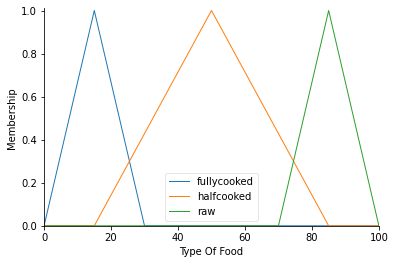

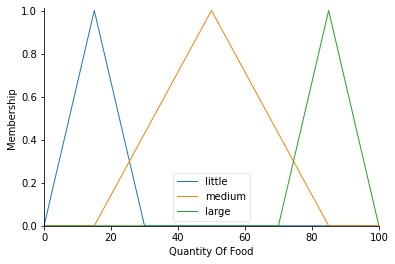

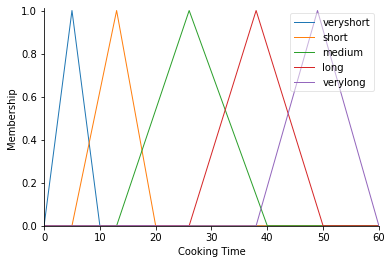

In [62]:
#User defined membership functions!

Type_of_food['fullycooked'] =fuzz.trimf(Type_of_food.universe,[0,15,30])
Type_of_food['halfcooked']  =fuzz.trimf(Type_of_food.universe,[15,50,85])
Type_of_food['raw']         =fuzz.trimf(Type_of_food.universe,[70,85,100])
Type_of_food.view()

Quantity_Of_food['little'] = fuzz.trimf(Quantity_Of_food.universe,[0,15,30])
Quantity_Of_food['medium'] = fuzz.trimf(Quantity_Of_food.universe,[15,50,85])
Quantity_Of_food['large']  = fuzz.trimf(Quantity_Of_food.universe,[70,85,100])
Quantity_Of_food.view()

Cooking_time['veryshort'] = fuzz.trimf(Cooking_time.universe,[0,5,10])
Cooking_time['short']     = fuzz.trimf(Cooking_time.universe,[5,13,20])
Cooking_time['medium']    = fuzz.trimf(Cooking_time.universe,[13,26,40])
Cooking_time['long']      = fuzz.trimf(Cooking_time.universe,[26,38,50])
Cooking_time['verylong']  = fuzz.trimf(Cooking_time.universe,[38,49,60])
Cooking_time.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3b5ee69610>)

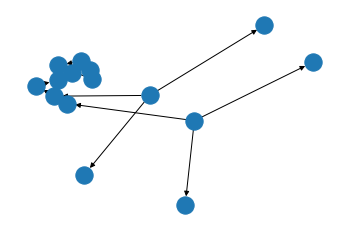

In [63]:
# Design set rules [Knowledge base]

rule1 = ctrl.Rule(Type_of_food['fullycooked'] & Quantity_Of_food['little'], Cooking_time['veryshort'])
rule2 = ctrl.Rule(Type_of_food['fullycooked'] & Quantity_Of_food['medium'], Cooking_time['short'])
rule3 = ctrl.Rule(Type_of_food['fullycooked'] & Quantity_Of_food['large'],  Cooking_time['medium'])
rule4 = ctrl.Rule(Type_of_food['raw'] & Quantity_Of_food['little'], Cooking_time['medium'])
rule5 = ctrl.Rule(Type_of_food['raw'] & Quantity_Of_food['medium'], Cooking_time['long'])
rule6 = ctrl.Rule(Type_of_food['raw'] & Quantity_Of_food['large'],  Cooking_time['verylong'])
rule7 = ctrl.Rule(Type_of_food['halfcooked'] & Quantity_Of_food['little'], Cooking_time['medium'])
rule8 = ctrl.Rule(Type_of_food['halfcooked'] & Quantity_Of_food['medium'], Cooking_time['short'])
rule9 = ctrl.Rule(Type_of_food['halfcooked'] & Quantity_Of_food['large'],  Cooking_time['long'])
rule1.view()

In [64]:
# FIS system
Cooking_time_controller=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
css=ctrl.ControlSystemSimulation(Cooking_time_controller)

In [65]:
css.input['Type Of Food'] = 50
css.input['Quantity Of Food'] = 50
css.compute()

In [66]:
print(css.output['Cooking Time'])

12.666666666666666


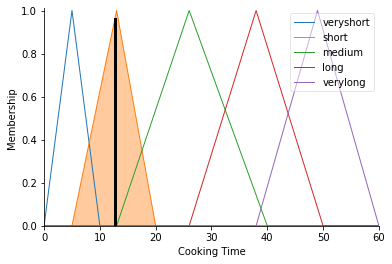

In [67]:
# plot output
Cooking_time.view(sim=css)